In [4]:
import numpy as np
import pandas as pd
import csv
import statistics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("data.csv")
features_names = ['valence','acousticness','danceability','duration_ms','energy','instrumentalness','liveness','loudness','popularity','speechiness','tempo']
values = data[features_names]
print(values)

print(np.shape(values))
print(type(values))
values=np.array(values)
print(type(values))
print(values)
print(np.shape(values))

        valence  acousticness  danceability  duration_ms  energy  \
0        0.0594       0.98200         0.279       831667   0.211   
1        0.9630       0.73200         0.819       180533   0.341   
2        0.0394       0.96100         0.328       500062   0.166   
3        0.1650       0.96700         0.275       210000   0.309   
4        0.2530       0.95700         0.418       166693   0.193   
...         ...           ...           ...          ...     ...   
170648   0.6080       0.08460         0.786       301714   0.808   
170649   0.7340       0.20600         0.717       150654   0.753   
170650   0.6370       0.10100         0.634       211280   0.858   
170651   0.1950       0.00998         0.671       337147   0.623   
170652   0.6420       0.13200         0.856       189507   0.721   

        instrumentalness  liveness  loudness  popularity  speechiness    tempo  
0               0.878000    0.6650   -20.096           4       0.0366   80.954  
1               0.000

In [6]:

features = StandardScaler().fit_transform(values)
print(features[170652])
print(features)

[ 0.43094764 -0.98426761  1.80884237 -0.32859144  0.89152137 -0.51774536
 -0.13637351  1.14778426  1.95029463  0.05903135 -0.71220119]
[[-1.7828247   1.27618658 -1.46701268 ... -1.25680847 -0.37970638
  -1.16930675]
 [ 1.65068832  0.61134711  1.59877887 ... -1.21099271  1.94548067
  -1.82117959]
 [-1.858821    1.22034007 -1.18882049 ... -1.21099271 -0.3962973
  -0.21240379]
 ...
 [ 0.41194856 -1.06670771  0.5484614  ...  2.04192615 -0.10749235
  -0.81976118]
 [-1.26756976 -1.30876246  0.75852489 ...  1.7670316   1.28798856
  -1.36140375]
 [ 0.43094764 -0.98426761  1.80884237 ...  1.95029463  0.05903135
  -0.71220119]]


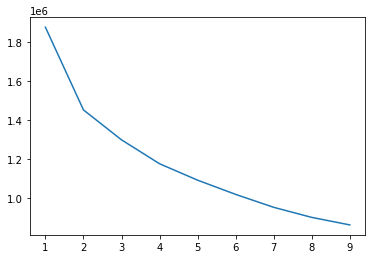

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
sse = {}
for k in range(1,10):
 kmeans = KMeans(n_clusters=k)
 kmeans.fit(features)
 sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

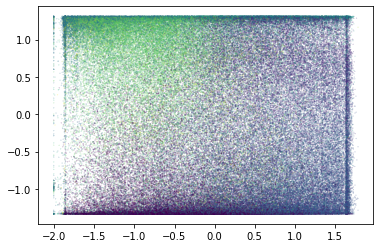

1
2


In [8]:
plt.scatter(features[:,0],features[:,1],c=kmeans.labels_,s = 0.01)
plt.show()
print(kmeans.labels_[1])
print(kmeans.labels_[17700])

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(features, cluster_labels))

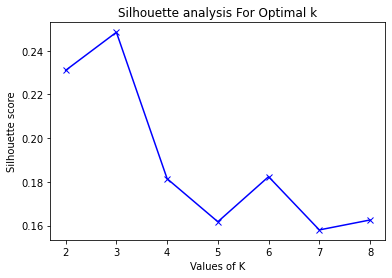

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [1]:
from sklearn.metrics.cluster import homogeneity_score

In [2]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
homogeneity_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(features)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 homogeneity_avg.append(homogeneity_score(features, cluster_labels))

NameError: ignored

In [ ]:
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Homogeneity score') 
plt.title('Homogeneity analysis For Optimal k')
plt.show()

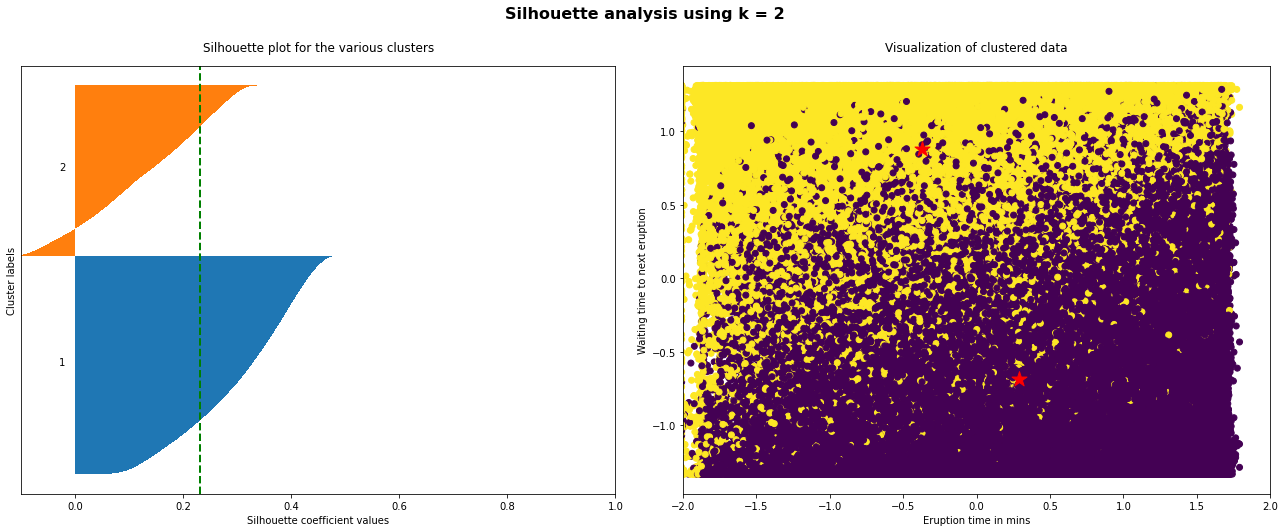

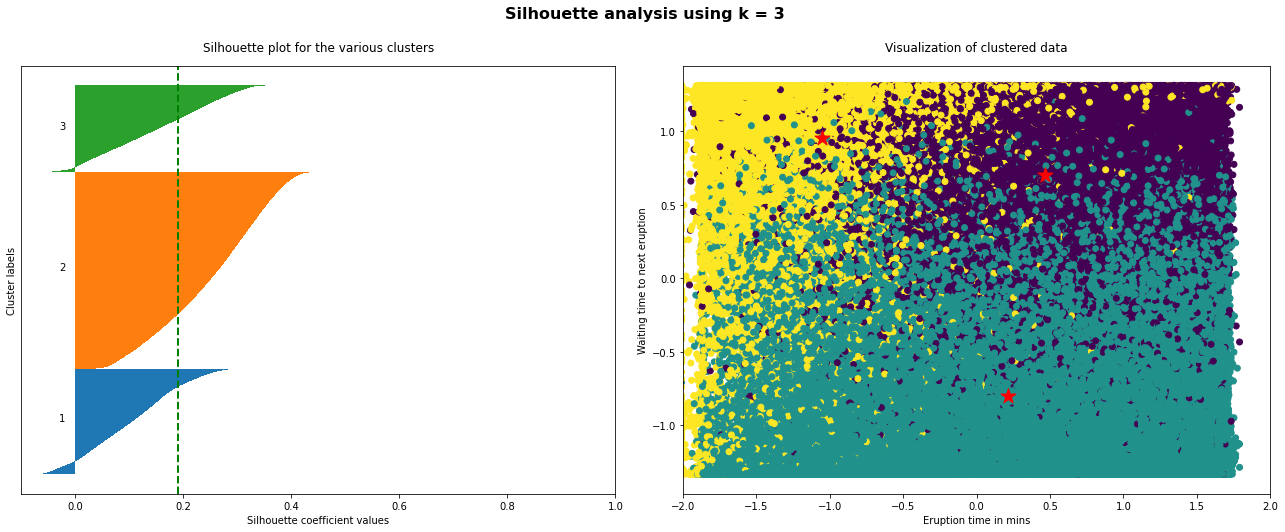

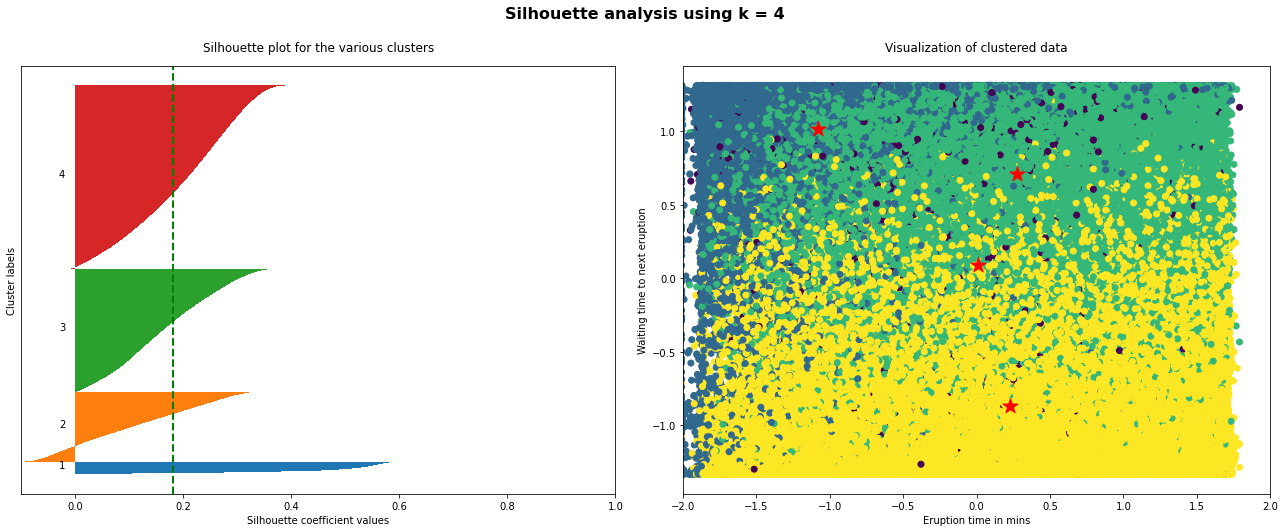

In [ ]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(features)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(features, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(features[:, 0], features[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

In [ ]:
pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: typer
    Found existing installation: typer 0.4.2
    Uninstalling typer-0.4.2:
      Successfully uninstalled typer-0.4.2


In [ ]:
from fcmeans import FCM
my_model = FCM(n_clusters=3)
my_model.fit(features)

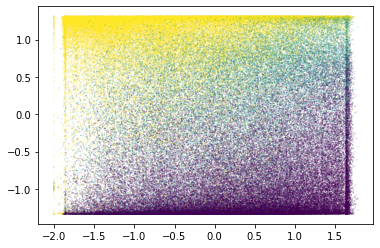

In [ ]:
plt.scatter(features[:,0],features[:,1],c=my_model.predict(features),s = 0.01)
plt.show()